# What this file does

Pulls data from IPEDS and looks at FTE enrollment by college. It also looks at the racial breakdown of all students in a college.

# Findings

Steepest declines from peak values around 2010 are Manchester, Naugatuck and Norwalk, while Asnuntuck showed general increases in full-time enrolled students. All three were driven by drops in white student enrollment.

# Tools

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('community_colleges.csv')

In [3]:
new_df = df.melt(id_vars=['Institution Name', 'UnitID'])

In [4]:
new_df['Year'] = new_df.variable.str.extract(r'.*EF(\d\d\d\d)').astype(float)

In [15]:
df_melted = pd.DataFrame(new_df.groupby(by=['Institution Name','Year']).value.sum())

In [20]:
df_melted=df_melted.reset_index()

# College by college, enrollment

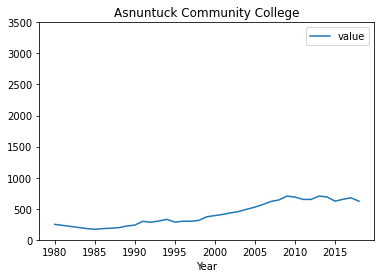

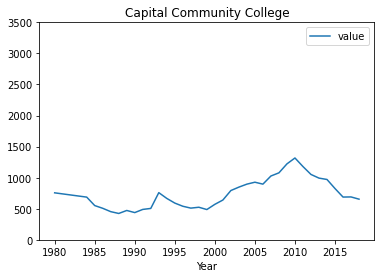

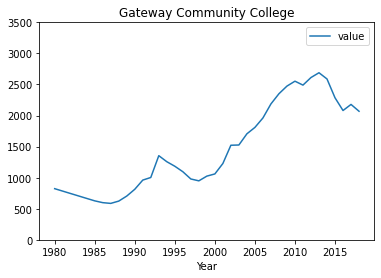

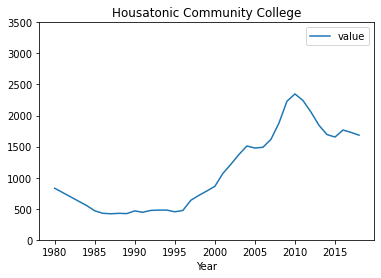

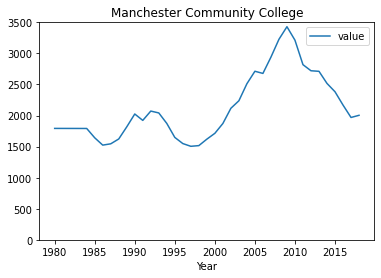

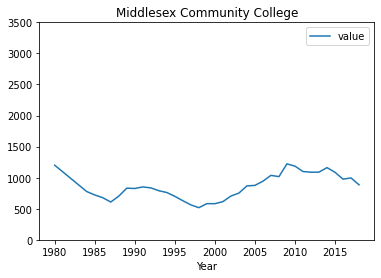

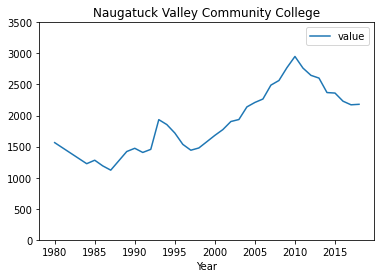

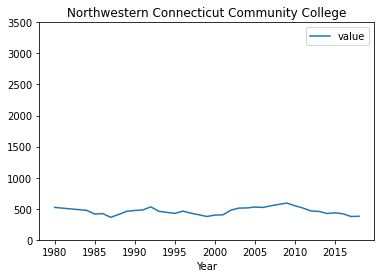

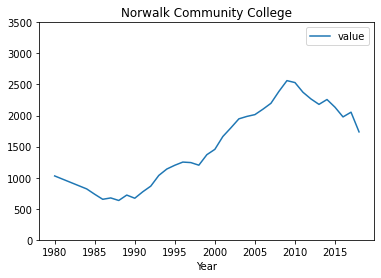

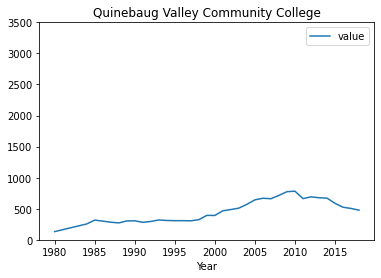

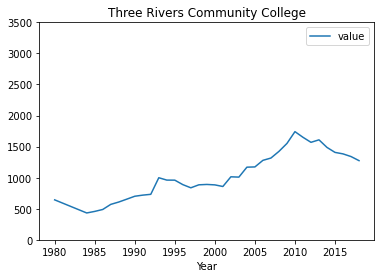

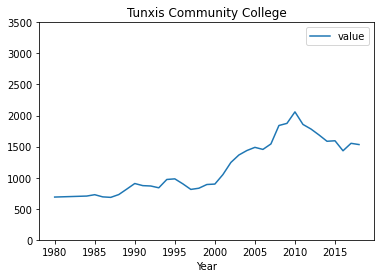

In [31]:
for name in df['Institution Name'].unique():
    ax = df_melted[df_melted['Institution Name']==name].plot(x='Year', y='value')
    ax.set_title(name)
    ax.set_ylim(0,3500)

# College by college, pct_change overall

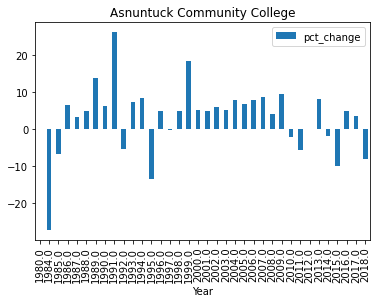

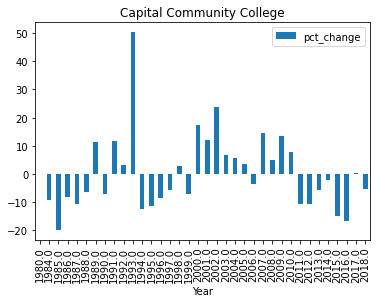

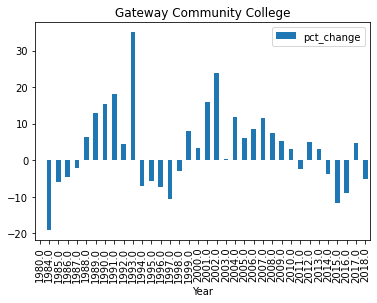

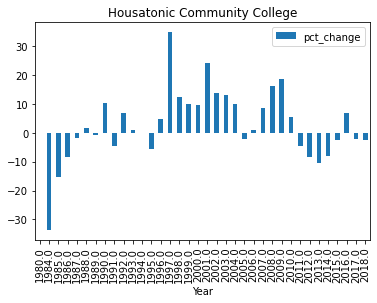

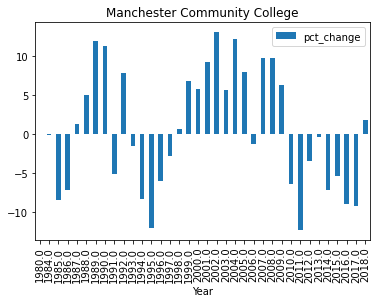

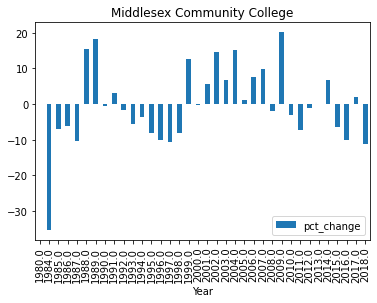

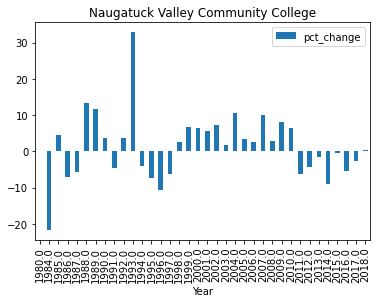

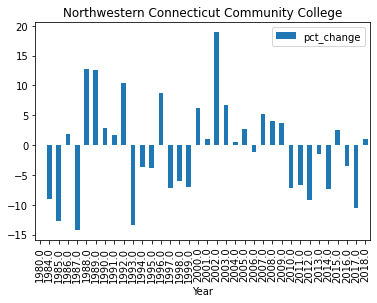

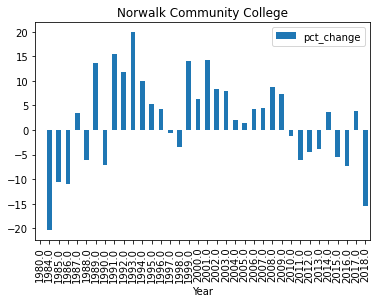

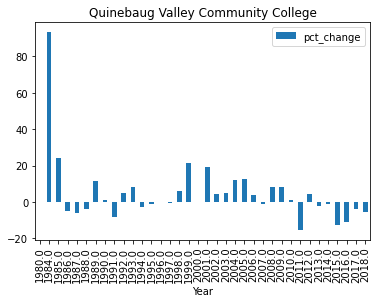

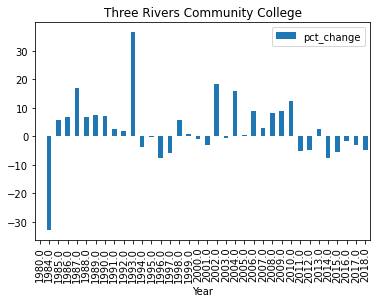

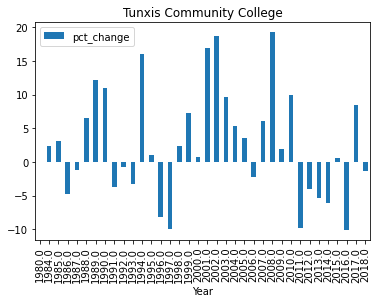

In [26]:
for name in df['Institution Name'].unique():
    df_melted['pct_change'] = 100*df_melted[df_melted['Institution Name']==name]['value'].pct_change()
    ax = df_melted[df_melted['Institution Name']==name].plot(x='Year', y='pct_change', kind='bar')
    ax.set_title(name)

# Race

In [131]:
df = pd.read_csv('community_colleges_race_gender.csv')

In [132]:
df

,UnitID,Institution Name,Grand total (EF2018A Full-time students total),Asian total (EF2018A Full-time students total),Hispanic total (EF2018A Full-time students total),Native Hawaiian or Other Pacific Islander total (EF2018A Full-time students total),White total (EF2018A Full-time students total),Black or African American total (EF2018A Full-time students total),Grand total (EF2017A_RV Full-time students total),Asian total (EF2017A_RV Full-time students total),...,Native Hawaiian or Other Pacific Islander total (EF2011A_RV Full-time students total),White total (EF2011A_RV Full-time students total),Black or African American total (EF2011A_RV Full-time students total),Grand total (EF2010A_RV Full-time students total),Asian total (EF2010A_RV Full-time students total),Hispanic total (EF2010A_RV Full-time students total),Native Hawaiian or Other Pacific Islander total (EF2010A_RV Full-time students total),White total (EF2010A_RV Full-time students total),Black or African American total (EF2010A_RV Full-time students total),Unnamed: 56
0,128577,Asnuntuck Community College,621,12,91,2,396,90,676,15,...,1,516,45,688,19,43,0,552,42,NaN
1,129367,Capital Community College,654,33,221,1,81,266,690,30,...,0,142,490,1317,40,387,0,196,554,NaN
2,130396,Gateway Community College,2069,98,625,5,707,469,2179,96,...,7,1113,602,2553,87,433,5,1124,551,NaN
3,129543,Housatonic Community College,1684,51,616,4,449,490,1729,59,...,0,797,584,2348,65,599,3,906,565,NaN
4,129695,Manchester Community College,2004,146,411,2,1000,325,1969,115,...,8,1709,338,3213,128,415,6,1973,349,NaN
5,129756,Middlesex Community College,885,41,174,2,541,71,996,29,...,0,733,90,1186,26,158,2,802,84,NaN
6,129729,Naugatuck Valley Community College,2181,74,691,2,980,245,2173,61,...,4,1704,232,2951,72,558,1,1823,228,NaN
7,130040,Northwestern Connecticut Community College,379,6,60,1,288,12,375,13,...,0,426,10,548,1,44,1,447,16,NaN
8,130004,Norwalk Community College,1737,69,683,3,564,275,2054,99,...,6,840,383,2531,74,677,3,934,393,NaN
9,130217,Quinebaug Valley Community College,477,5,46,1,400,6,505,8,...,0,457,17,783,8,85,0,575,19,NaN


In [121]:
new_df = df.melt(id_vars=['Institution Name', 'UnitID'])

In [122]:
new_df['Year'] = new_df.variable.str.extract(r'.*EF(\d\d\d\d)').astype(float)

In [123]:
new_df = new_df[(new_df.variable.str.contains(r'Asian total')==True)|(new_df.variable.str.contains(r'African American total')==True)|((new_df.variable.str.contains(r'Hispanic total')==True))|(new_df.variable.str.contains(r'White total')==True)|(new_df.variable.str.contains(r'Grand total')==True)]

In [124]:
new_df['new_variable'] = new_df.variable.str.extract(r'(.*) .E.*')

In [125]:
new_df = new_df.drop(columns='variable')

In [126]:
final_df = new_df.pivot(index=['Year', 'Institution Name'],  columns='new_variable', values='value').reset_index()

In [127]:
final_df

new_variable,Year,Institution Name,Asian total,Black or African American total,Grand total,Hispanic total,White total
0,2010.0,Asnuntuck Community College,19.0,42.0,688.0,43.0,552.0
1,2010.0,Capital Community College,40.0,554.0,1317.0,387.0,196.0
2,2010.0,Gateway Community College,87.0,551.0,2553.0,433.0,1124.0
3,2010.0,Housatonic Community College,65.0,565.0,2348.0,599.0,906.0
4,2010.0,Manchester Community College,128.0,349.0,3213.0,415.0,1973.0
...,...,...,...,...,...,...,...
103,2018.0,Northwestern Connecticut Community College,6.0,12.0,379.0,60.0,288.0
104,2018.0,Norwalk Community College,69.0,275.0,1737.0,683.0,564.0
105,2018.0,Quinebaug Valley Community College,5.0,6.0,477.0,46.0,400.0
106,2018.0,Three Rivers Community College,55.0,85.0,1274.0,172.0,816.0


# College by college, racial composition

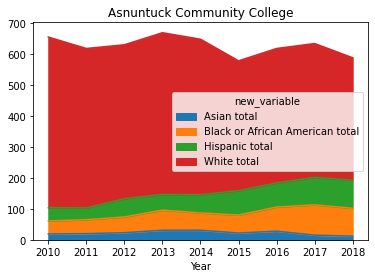

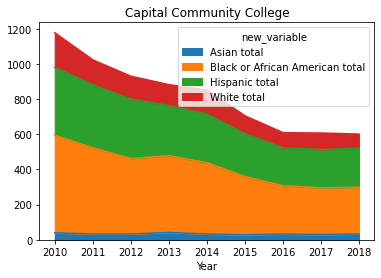

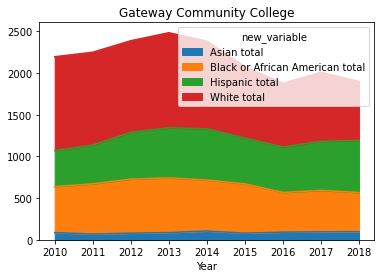

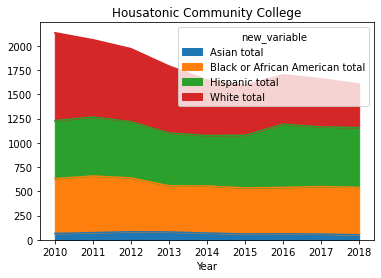

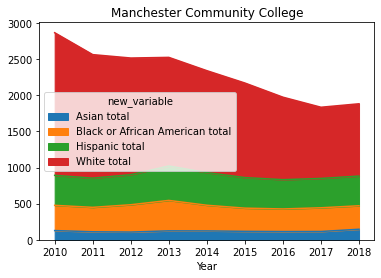

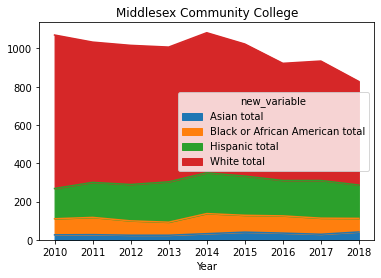

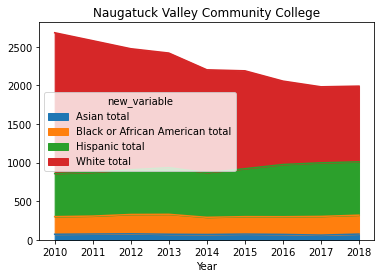

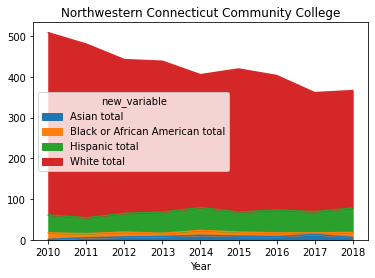

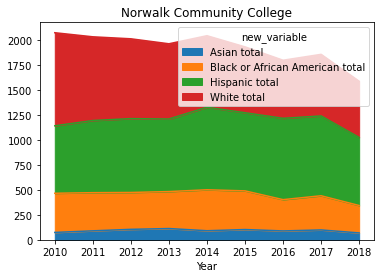

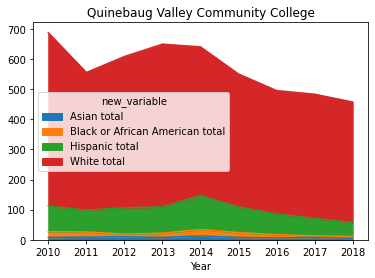

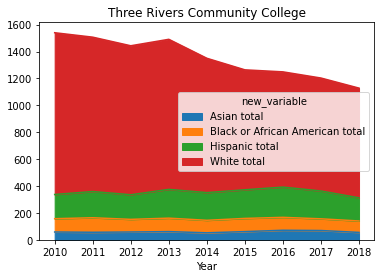

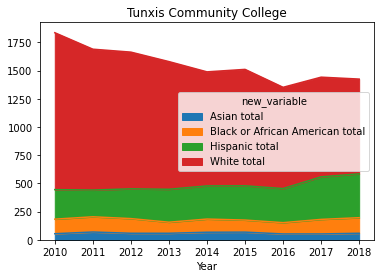

In [130]:
for name in df['Institution Name'].unique():
    ax = final_df[final_df['Institution Name']==name][['Asian total','Black or African American total','Hispanic total','White total','Year']].plot.area(x='Year')
    ax.set_title(name)

In [109]:
final_df


new_variable,Year,Institution Name,Asian total,Black or African American total,Grand total,Hispanic total,White total
0,2010.0,Asnuntuck Community College,19.0,42.0,688.0,43.0,552.0
1,2010.0,Capital Community College,40.0,554.0,1317.0,387.0,196.0
2,2010.0,Central Connecticut State University,232.0,680.0,8540.0,656.0,6561.0
3,2010.0,Gateway Community College,87.0,551.0,2553.0,433.0,1124.0
4,2010.0,Housatonic Community College,65.0,565.0,2348.0,599.0,906.0
...,...,...,...,...,...,...,...
112,2018.0,Northwestern Connecticut Community College,6.0,12.0,379.0,60.0,288.0
113,2018.0,Norwalk Community College,69.0,275.0,1737.0,683.0,564.0
114,2018.0,Quinebaug Valley Community College,5.0,6.0,477.0,46.0,400.0
115,2018.0,Three Rivers Community College,55.0,85.0,1274.0,172.0,816.0


# College by college, racial composition as a %

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kasturipananjady/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

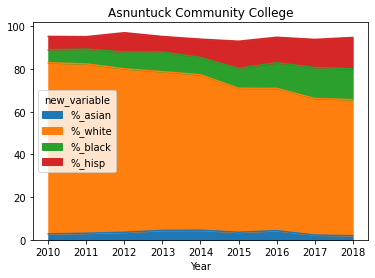

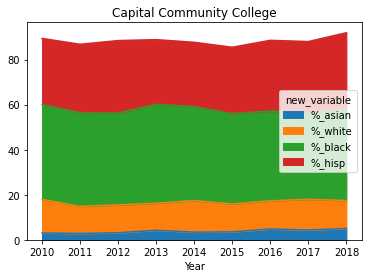

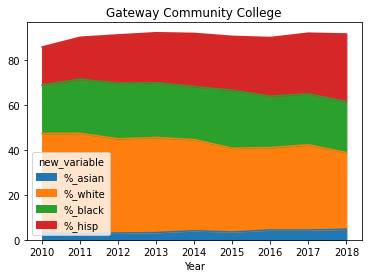

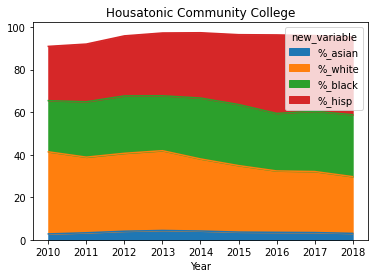

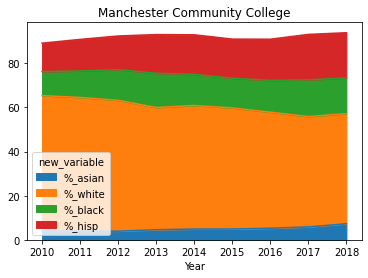

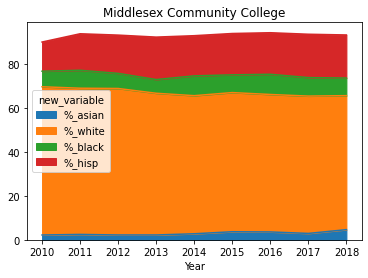

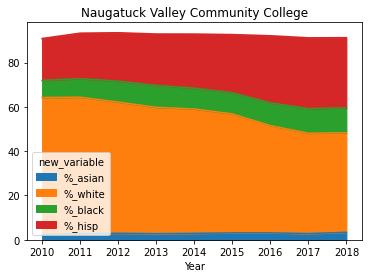

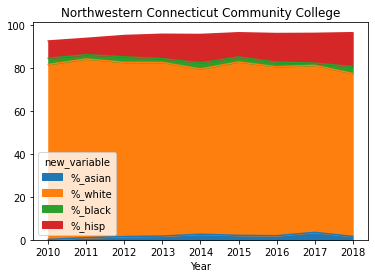

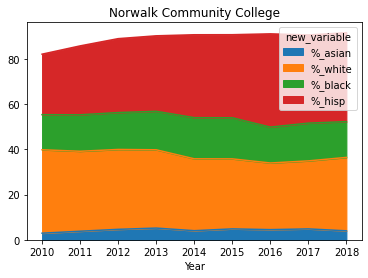

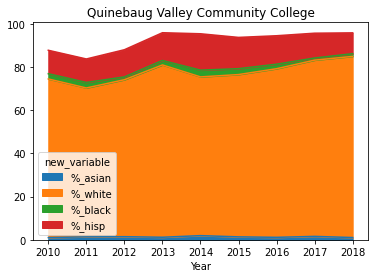

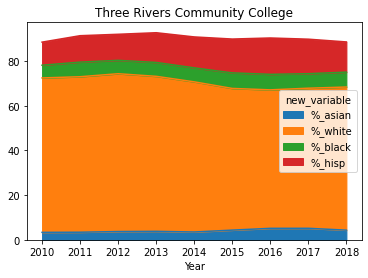

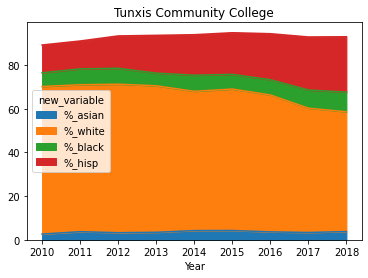

In [133]:
for name in df['Institution Name'].unique():
    
    df_now = final_df[final_df['Institution Name']==name]
    df_now['%_asian'] = 100*df_now['Asian total'] /df_now['Grand total']
    df_now['%_white'] = 100*df_now['White total'] /df_now['Grand total']
    df_now['%_black'] = 100*df_now['Black or African American total'] /df_now['Grand total']
    df_now['%_hisp'] = 100*df_now['Hispanic total'] /df_now['Grand total']

    
    ax = df_now[['%_asian','%_white','%_black','%_hisp','Year']].plot.area(x='Year')
    ax.set_title(name)